# Probability of Device's Failure

## 1. Overview:

- The purpose of this project is to determine the chance of device's failure utilizing Machine Learning Technique.
- In addition, glancing through the set of data, each row of the original data represents a record of the status of a devices which listed in attributes #
- By determining how each attributes change, we can create a Machine learning model that would predict the probability of devices' failure

## 2. Import Libraries and Data

### 2.1 Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import recall_score, f1_score, precision_score
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.stats import linregress    
# from datetime import datetime as dt
# from sklearn.metrics import classification_report
#from sklearn.model_selection import GridSearchCV
import xgboost
#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')
%matplotlib inline

/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### 2.2 Data

In [2]:
df = pd.read_csv('failure.csv')

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


<AxesSubplot:ylabel='Frequency'>

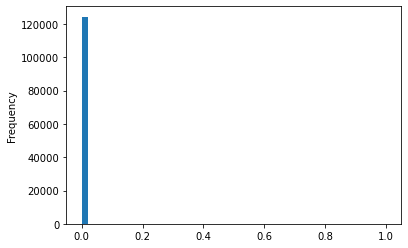

In [5]:
df.failure.plot(kind='hist', bins=50)

### 3.1 Unique Data

In [6]:
device_fail = df['device'][df['failure']==1]
#device_fail = list(device_fail)
(device_fail.nunique(), df.device.nunique())

(106, 1168)

### 3.2 Data Analysis

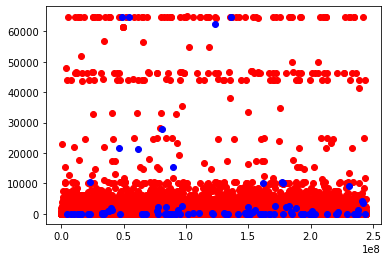

In [7]:
df_0 = df[df['failure']==0]
df_1 = df[df['failure']==1]
plt.scatter(df_0.attribute1, df_0.attribute2, c='r')
plt.scatter(df_1.attribute1, df_1.attribute2, c='b')

In [8]:
device_fail.nunique()

106

Total data was record in an interval of 304 days (less than a year). There are many columns with less than 50 unique values. Something worth to investigate

One thing we need to determine before training the model:
Is any of these features categorical? For example, one attribute could mean type of error it is getting. Another could mean thermal level. Another could mean signal strength.


In [9]:
df.shape[0]

124494

In [10]:
print("Attribute 3")
print("-------------------")
print("Failure = 1")
print(df['attribute3'][df['device'].isin(device_fail)].value_counts())
print("-------------------")
print("-------------------")
print("Failure = 0")
print(df['attribute3'][~df['device'].isin(device_fail)].value_counts())

Attribute 3
-------------------
Failure = 1
0      9643
1       339
9       229
2       193
318     177
70      118
8        14
Name: attribute3, dtype: int64
-------------------
-------------------
Failure = 0
0        105716
1          2935
2           556
7           298
34          293
5           278
21          269
4           268
61          245
100         245
10          241
1331        240
220         240
8           237
107         228
15          225
62          224
2693        179
3           113
18          106
56           96
12           90
72           84
263          84
406          84
35           70
9            33
11           14
208          13
14           12
266           6
323           6
2112          6
25            6
377           6
16            5
382           5
36            5
53            5
1326          5
24929         4
279           3
24            1
38            1
1162          1
Name: attribute3, dtype: int64


In [11]:
print("Attribute 5")
print("-------------------")
print("Failure = 1")
print(df['attribute5'][df['device'].isin(device_fail)].value_counts())
print("-------------------")
print("-------------------")
print("Failure = 0")
print(df['attribute5'][~df['device'].isin(device_fail)].value_counts())

Attribute 5
-------------------
Failure = 1
8     2605
9     1147
7     1064
6      958
12     893
10     844
14     531
13     467
16     463
91     215
3      208
90     133
17     127
4      124
11     117
65     117
36     102
58      99
40      70
24      64
23      63
25      52
34      31
64      28
31      27
35      27
5       27
37      26
2       21
19      19
33      18
29       9
30       9
41       8
Name: attribute5, dtype: int64
-------------------
-------------------
Failure = 0
8     19539
11    12676
9     12450
10    10636
7     10207
12     8950
6      7584
13     5539
5      3402
14     2986
16     2677
15     1337
17      925
19      882
4       809
58      672
63      672
60      672
95      672
24      656
37      609
3       607
23      494
32      476
36      460
68      448
57      448
92      448
20      421
38      291
33      288
25      253
39      252
18      251
90      224
89      224
78      224
94      224
66      224
70      224
62      224
64     

In [12]:
print("Attribute 7")
print("-------------------")
print("Failure = 1")
print(df['attribute7'][df['device'].isin(device_fail)].value_counts())
print("-------------------")
print("-------------------")
print("Failure = 0")
print(df['attribute7'][~df['device'].isin(device_fail)].value_counts())

Attribute 7
-------------------
Failure = 1
0      9971
8       320
16      280
24       51
48       29
40       14
32       14
56        6
96        6
72        5
80        3
152       2
176       2
832       2
22        2
136       1
424       1
240       1
496       1
744       1
216       1
Name: attribute7, dtype: int64
-------------------
-------------------
Failure = 0
0      113065
8         473
16        117
128        23
32         21
176        18
24         14
6          13
48          7
40          6
72          6
312         5
736         4
104         3
272         2
112         2
80          1
96          1
Name: attribute7, dtype: int64


In [13]:
print("Attribute 8")
print("-------------------")
print("Failure = 1")
print(df['attribute8'][df['device'].isin(device_fail)].value_counts())
print("-------------------")
print("-------------------")
print("Failure = 0")
print(df['attribute8'][~df['device'].isin(device_fail)].value_counts())

Attribute 8
-------------------
Failure = 1
0      9971
8       320
16      280
24       51
48       29
40       14
32       14
56        6
96        6
72        5
80        3
152       2
176       2
832       2
22        2
136       1
424       1
240       1
496       1
744       1
216       1
Name: attribute8, dtype: int64
-------------------
-------------------
Failure = 0
0      113065
8         473
16        117
128        23
32         21
176        18
24         14
6          13
48          7
40          6
72          6
312         5
736         4
104         3
272         2
112         2
80          1
96          1
Name: attribute8, dtype: int64


In [14]:
print("Attribute 9")
print("-------------------")
print("Failure = 1")
print(df['attribute9'][df['device'].isin(device_fail)].value_counts())
print("-------------------")
print("-------------------")
print("Failure = 0")
print(df['attribute9'][~df['device'].isin(device_fail)].value_counts())

Attribute 9
-------------------
Failure = 1
0       8362
1        481
2        476
5        248
3        244
7        184
41       141
11       137
18       137
1165     118
10        78
19        40
52        19
8         17
4         14
1080      14
9          2
6          1
Name: attribute9, dtype: int64
-------------------
-------------------
Failure = 0
0        88996
1         8955
2         3246
3         2083
4         1382
6          796
8          716
7          590
10         563
33         528
5          487
24         485
34         480
13         376
9          333
18         310
14         250
12         250
145        249
205        245
42         240
26         240
20         224
104        224
155        224
22         195
2522       179
248         84
1150        84
263         84
120         84
241         84
233         84
15          84
2637        84
23          76
98          48
21          19
25          13
70           6
269          6
164          6
11       

### 3.3 Failure Rate

In [15]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

It seems that there are less than 1% of records have failure. This is not helpful since it showed tremendous amount of imbalanced Data. Let's do group by device to get a clearer picture

In [16]:
df_rate = df.groupby('device').mean()['failure']
df_rate[df_rate>0]

device
S1F023H2    0.052632
S1F03YZM    0.004651
S1F09DZQ    0.005025
S1F0CTDN    0.142857
S1F0DSTY    0.022222
              ...   
Z1F1901P    0.007576
Z1F1AG5N    0.111111
Z1F1FCH5    0.052632
Z1F1RJFA    0.008065
Z1F1VQFY    0.008000
Name: failure, Length: 106, dtype: float64

In [17]:
df_rate = df.groupby('device').mean()
df_rate.reset_index(inplace=True)

In [18]:
df_rate

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,S1F01085,0.000,1.159330e+08,56.0,0.0,52.0,6.000000,407878.500000,0.0,0.0,7.0
1,S1F013BB,0.000,1.198783e+08,0.0,0.0,0.0,5.000000,689021.000000,0.0,0.0,0.0
2,S1F0166B,0.000,1.074958e+08,0.0,3.0,0.0,6.000000,403549.166667,0.0,0.0,0.0
3,S1F01E6Y,0.000,1.331127e+08,0.0,0.0,0.0,12.000000,254926.604167,0.0,0.0,0.0
4,S1F01JE0,0.000,1.673001e+08,0.0,0.0,0.0,6.000000,410630.833333,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1163,Z1F1VMZB,0.000,1.223971e+08,0.0,0.0,0.0,5.000000,222737.729452,0.0,0.0,0.0
1164,Z1F1VQFY,0.008,1.237567e+08,0.0,0.0,0.0,6.328000,249436.960000,0.0,0.0,0.0
1165,Z1F26YZB,0.000,1.205072e+08,0.0,1.0,0.0,1.000000,288869.226190,0.0,0.0,0.0
1166,Z1F282ZV,0.000,1.180013e+08,0.0,1.0,0.0,1.000000,188909.761905,0.0,0.0,0.0


In [19]:
df_rate = df_rate.loc[:,['device', 'failure']]
df_rate

,device,failure
0,S1F01085,0.000
1,S1F013BB,0.000
2,S1F0166B,0.000
3,S1F01E6Y,0.000
4,S1F01JE0,0.000
...,...,...
1163,Z1F1VMZB,0.000
1164,Z1F1VQFY,0.008
1165,Z1F26YZB,0.000
1166,Z1F282ZV,0.000


In [20]:
df_rate.failure.value_counts()

0.000000    1062
0.052632       8
0.038462       3
0.028571       3
0.142857       3
            ... 
0.050000       1
0.055556       1
0.005208       1
0.003597       1
0.008065       1
Name: failure, Length: 75, dtype: int64

<AxesSubplot:xlabel='failure', ylabel='attribute1'>

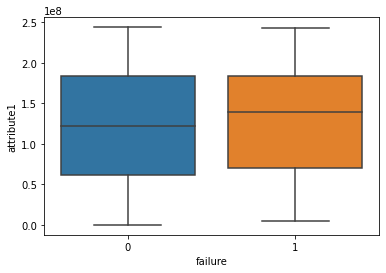

In [21]:
sns.boxplot(x=df.failure,  y = df.attribute1)

<AxesSubplot:xlabel='failure', ylabel='attribute3'>

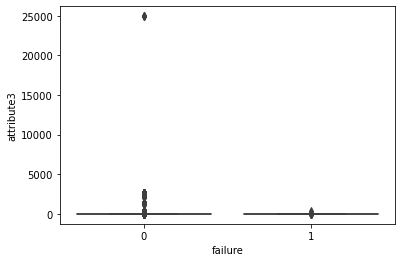

In [22]:
sns.boxplot(x=df.failure,  y = df.attribute3)

Text(0.5, 1.0, 'attribute 9')

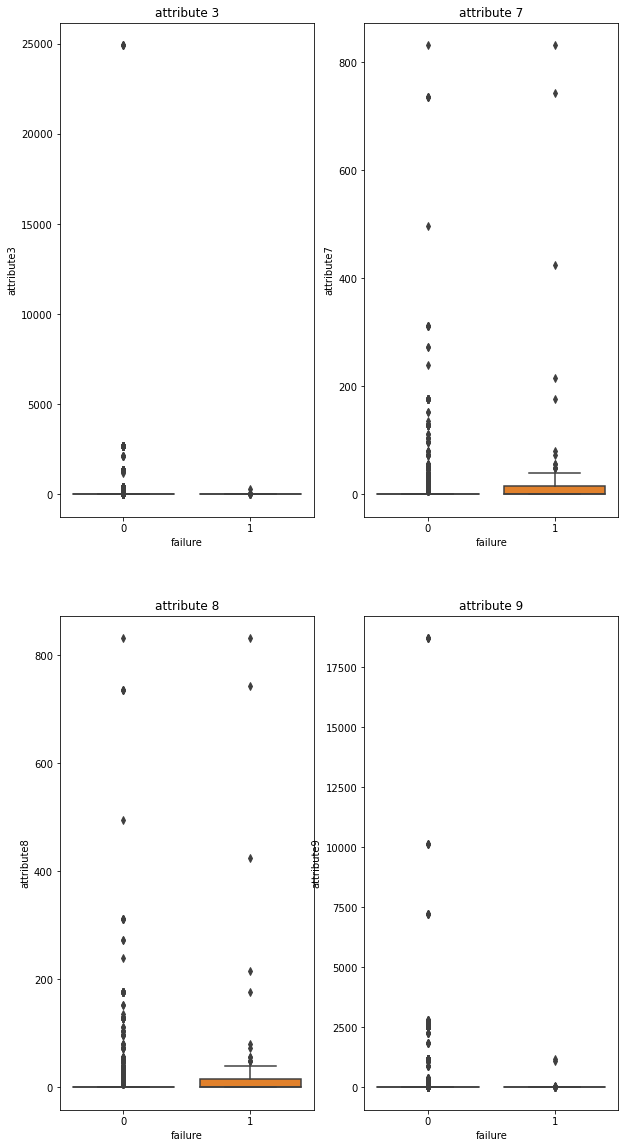

In [23]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(221)
sns.boxplot(x=df.failure,  y = df.attribute3).set_title('attribute 3')
ax2 = fig.add_subplot(222)
sns.boxplot(x=df.failure,  y = df.attribute7).set_title('attribute 7')
ax3 = fig.add_subplot(223)
sns.boxplot(x=df.failure,  y = df.attribute8).set_title('attribute 8')
ax4 = fig.add_subplot(224)
sns.boxplot(x=df.failure,  y = df.attribute9).set_title('attribute 9')

/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

Text(0.5, 1.0, 'attribute 9')

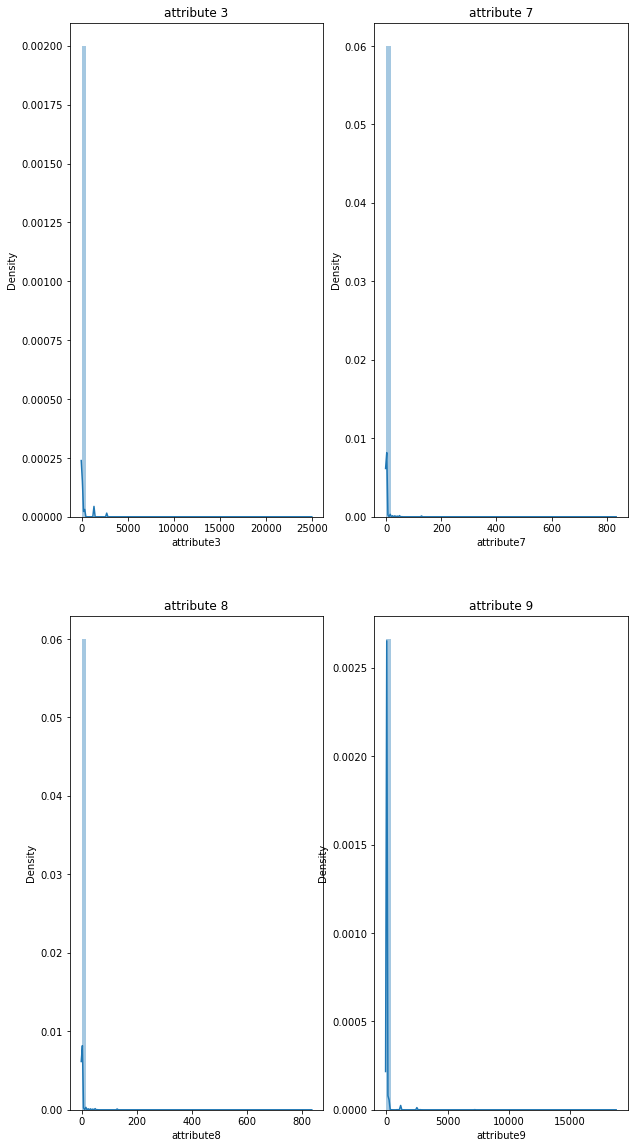

In [24]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(221)
sns.distplot(df.attribute3).set_title('attribute 3')
ax2 = fig.add_subplot(222)
sns.distplot(df.attribute7).set_title('attribute 7')
ax3 = fig.add_subplot(223)
sns.distplot(df.attribute8).set_title('attribute 8')
ax4 = fig.add_subplot(224)
sns.distplot(df.attribute9).set_title('attribute 9')


In [25]:
devices = df.device.unique()

In [26]:
df_device = df.groupby(by="device").sum()

<AxesSubplot:xlabel='failure', ylabel='attribute7'>

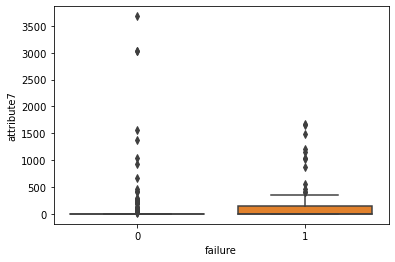

In [27]:
sns.boxplot(x=df_device.failure,  y = df_device.attribute7)

##  4. Feature Engineer: 

Convert attributes into log values

In [28]:
for i in df.columns:
    if i not in ['device', 'failure', 'date']:
        df[i] = np.log1p(df[i])

<br>Convert date into date type then to ordinal format

In [29]:
df['date'] = pd.to_datetime(df['date'])
df['date']=df['date'].apply(lambda x: x.toordinal())

In [30]:
slope_final = df
slope_final.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,735599,S1F01085,0,19.189078,4.043051,0.000000,3.970292,1.945910,12.917647,0.0,0.0,2.079442
1,735599,S1F0166B,0,17.932443,0.000000,1.386294,0.000000,1.945910,12.907126,0.0,0.0,0.000000
2,735599,S1F01E6Y,0,18.970511,0.000000,0.000000,0.000000,2.564949,12.377481,0.0,0.0,0.000000
3,735599,S1F01JE0,0,18.193705,0.000000,0.000000,0.000000,1.945910,12.924368,0.0,0.0,0.000000
4,735599,S1F01R2B,0,18.727948,0.000000,0.000000,0.000000,2.772589,12.654514,0.0,0.0,1.386294


### 5. Modeling

#### 5.1 Define Function to be used later:

In [31]:
def score_result(y, pred):
    print('Precision Score is', precision_score(y, pred))
    print('Recall Score is', recall_score(y, pred))
    print('f1_score is ', f1_score(y, pred))


def f1_score_1(model, fold = 5):
    f1_score = cross_val_score(estimator=model, cv=fold,X=x, y=y,scoring='f1')
    return f1_score
def precision_1(model, fold = 5):
    precision = cross_val_score(estimator=model, cv=fold,X=x, y=y,scoring='precision')
    return precision
def recall_s(model, fold = 5):
    recall_s = cross_val_score(estimator=model, cv=fold,X=x, y=y,scoring='recall')
    return recall_s
def Scoring(model):
    print("f1 score is: ", f1_score_1(model).mean())
    print("precision is: ", precision_1(model).mean())
    print("recall is: ", recall_s(model).mean())


def modelfit(alg, dtrain, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain, target)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain, target, cv=cv_folds, scoring='recall')
    
    #Print model report:
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (
        np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))

    #Print Feature Importance:
    if printFeatureImportance:
        #feat_imp = pd.Series(alg.feature_importances_, dtrain.columns.tolist()).sort_values(ascending=False)
        #feat_imp.plot(kind='bar', title='Feature Importances')
        #plt.ylabel('Feature Importance Score')
        feat_imp = pd.DataFrame(alg.feature_importances_, columns=['value'])
        x_columns = pd.DataFrame(dtrain.columns, columns = ['feature'])
        feat_imp = pd.concat([x_columns,feat_imp], axis = 1).sort_values(by = 'value', ascending = False)
        feat_imp = feat_imp.head(12)
        sns.barplot(x = feat_imp['value'], y = feat_imp['feature']).set_title('Feature Importance Score')

In [32]:
x = slope_final.drop(['device', 'failure'], axis =1)
y = slope_final['failure']
for i in ['attribute7', 'attribute8', 'attribute1', 'attribute2']:
    x[i]= x[i]**3

In [33]:
slope_final.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,735599,S1F01085,0,19.189078,4.043051,0.000000,3.970292,1.945910,12.917647,0.0,0.0,2.079442
1,735599,S1F0166B,0,17.932443,0.000000,1.386294,0.000000,1.945910,12.907126,0.0,0.0,0.000000
2,735599,S1F01E6Y,0,18.970511,0.000000,0.000000,0.000000,2.564949,12.377481,0.0,0.0,0.000000
3,735599,S1F01JE0,0,18.193705,0.000000,0.000000,0.000000,1.945910,12.924368,0.0,0.0,0.000000
4,735599,S1F01R2B,0,18.727948,0.000000,0.000000,0.000000,2.772589,12.654514,0.0,0.0,1.386294


<br>
#### List of Model and their initialization:

In [34]:
xgc = xgboost.XGBClassifier(n_estimators = 150, learning_rate = 0.1)
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=120, max_depth=3, min_samples_leaf=30, min_samples_split=5, subsample=0.9)
ada = AdaBoostClassifier(learning_rate = 0.4, n_estimators=100)
models_list = (xgc, gbc, ada)

#### Start Cross validation between different Models

XGB: 


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:59:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:00:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:00:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:00:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:00:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score is:  0.041165420739888825
[18:00:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will b

[18:00:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from

[18:01:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:01:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:01:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
precision is:  0.04583333333333333
[18:01:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will b

[18:01:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:01:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:01:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:02:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
recall is:  0.05541125541125541
None
Gradient Boost: 
f1 score is:  0.026328415759114772


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision is:  0.018571428571428572
recall is:  0.11298701298701297
None
AdaBoost: 
f1 score is:  0.059125545914035404
precision is:  0.3311171808183713
recall is:  0.42770562770562764
None
[18:05:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will b

[18:05:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:05:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:05:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV Score : Mean - 0.05541126 | Std - 0.06669477 | Min - 0 | Max - 0.1818182


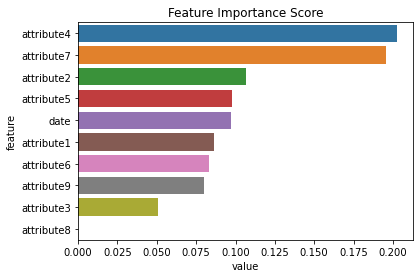

In [35]:
print("XGB: ")
print(Scoring(xgc))
print("Gradient Boost: ")
print(Scoring(gbc))
print("AdaBoost: ")
print(Scoring(ada))

modelfit(xgc, x, y)

### ReFeature Engineering to improve Score

<br>
##### Using groupby mean()

XGB: 
[18:06:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will b

[18:06:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score is:  0.6117678812415654
[18:06:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will b

[18:06:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
precision is:  0.6790849673202615
[18:06:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will b

[18:06:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
recall is:  0.5567099567099567
None
Gradient Boost: 
f1 score is:  0.6191003148897887
precision is:  0.6995915032679739
recall is:  0.5662337662337662
None
AdaBoost: 
f1 score is:  0.3612622955237556
precision is:  0.6122619047619048
recall is:  0.26363636363636356
None
[18:06:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will b

[18:06:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:06:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV Score : Mean - 0.55671 | Std - 0.06324496 | Min - 0.4761905 | Max - 0.6666667


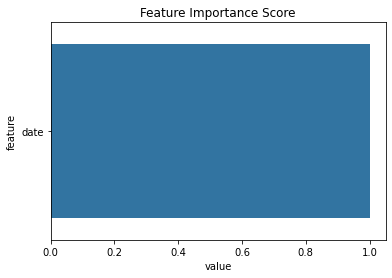

In [36]:
slope_final = pd.DataFrame([])
slope_df = df.groupby(by='device').mean()
failure = df.groupby(by='device').sum()
slope_final = pd.concat([slope_df.drop(['failure','date'], axis =1),failure['failure'].rename('failure')],axis =1)
date =  df.groupby(by='device').count()
slope_final = pd.concat([slope_final,date['date'].rename('date')],axis =1)
slope_final = slope_final.reset_index()

x = slope_final.loc[:, ['date']]
y = slope_final['failure']

print("XGB: ")
print(Scoring(xgc))

print("Gradient Boost: ")
print(Scoring(gbc))

print("AdaBoost: ")
print(Scoring(ada))

modelfit(xgc, x, y)

<br>
###### Using Group by sum()

In [37]:
slope_final = pd.DataFrame([])
slope_df = df.groupby(by='device').sum()
failure = df.groupby(by='device').sum()
slope_final = pd.concat([slope_df.drop(['failure','date'], axis =1),failure['failure'].rename('failure')],axis =1)
date =  df.groupby(by='device').count()
slope_final = pd.concat([slope_final,date['date'].rename('date')],axis =1)
slope_final = slope_final.reset_index()


x = slope_final.drop(['failure','device'], axis =1)
y = slope_final['failure']

print("XGB: ")
print(Scoring(xgc))

print("Gradient Boost: ")
print(Scoring(gbc))

print("AdaBoost: ")
print(Scoring(ada))


XGB: 
[18:06:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will b

[18:07:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:07:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:07:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:07:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score is:  0.6598831427319799
[18:07:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will b

[18:07:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:07:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:07:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:07:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
precision is:  0.7868939393939395
[18:07:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will b

[18:07:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:07:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:07:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgavlasova/.conda/envs/life-elixir_notebooks/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:07:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
recall is:  0.5835497835497836
None
Gradient Boost: 
f1 score is:  0.6876373626373626
precision is:  0.7851133763261909
recall is:  0.6212121212121211
None
AdaBoost: 
f1 score is:  0.6874555164877746
precision is:  0.8255555555555556
recall is:  0.6017316017316018
None


Combine Columns 3 and 8

In [ ]:
def transform_columns(list_feature, frame):
    frame[list_feature[0] + ' ' +list_feature[1]] = frame[list_feature[0]] + frame[list_feature[1]]
    frame1 = frame.drop([list_feature[0],list_feature[1]], axis =1)
    return frame1
df2 = df

slope_final = pd.DataFrame([])
df2 = transform_columns(['attribute3','attribute8'], df2)
for column in df2.columns:
    if column not in ['date', 'device','failure']:
        slope_df = df2.groupby(by='device').apply(lambda x: linregress(x.date,x[column])[0])
        slope_final = pd.concat([slope_final,slope_df.rename(column)],axis =1)
failure = df.groupby(by='device').sum()
slope_final = pd.concat([slope_final,failure['failure'].rename('failure')],axis =1)
date =  df.groupby(by='device').count()
slope_final = pd.concat([slope_final,date['date'].rename('date')],axis =1)
slope_final = slope_final.reset_index()

x = slope_final.drop(['device', 'failure'], axis =1)
y = slope_final['failure']

print("XGB: ")
print(Scoring(xgc))
print("Gradient Boost: ")
print(Scoring(gbc))
print("AdaBoost: ")
print(Scoring(ada))

modelfit(xgc, x, y)

### 6. Predict Model

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state =1)

In [ ]:
xgc = xgc.fit(x_train, y_train)

In [ ]:
xgc_pred = xgc.predict(x_test)
xgc_proba = xgc.predict_proba(x_test)
xgc_pred = pd.Series(xgc_pred)

In [ ]:
score_result(y_test, xgc_pred)

In [ ]:
xgc_proba1 = pd.DataFrame(xgc_proba,columns = ['Failure_0', 'Failure_1'])
xgc_pred1 = pd.DataFrame(xgc_pred,columns = ['predict'])

In [ ]:
y1 = pd.DataFrame(y_test.reset_index()['failure'])
y1.columns = ['Actual']
final = pd.concat([y1,xgc_pred1], axis =1)
final = pd.concat([final,xgc_proba1], axis =1)

In [ ]:
final